## Green Belt - Lista de Exercícios 1  
### Gráficos de Tendência e de Frequência

1 - Uma empresa de logística oferece um serviço de entregas para uma série de clientes dos 
ramos farmacêutico e alimentício. Tradicionalmente, a empresa se responsabilizava apenas pela 
entrega de produtos não perecíveis, devido ao receio de sua direção no manuseio de produtos 
perecíveis. Segundo os diretores, trabalhar com produtos perecíveis consistia em um risco muito 
grande, pois qualquer atraso nas entregas poderia causar a perda do material transportado, o 
que resultaria em multas e perda da credibilidade dos clientes.

Nos últimos meses, devido a uma série de problemas que ocorreram no mercado, esta empresa 
aceitou fazer algumas entregas de produtos perecíveis para seus clientes. A ideia dos diretores 
era “resolver o problema” dos clientes e não embarcar em um novo seguimento de negócios. 
Porém, eles começaram a se interessar pelo preço mais alto pago pelo transporte dos perecíveis 
e decidiram avaliar se conseguiriam ou não abraçar este mercado. Segundo a consulta que 
fizeram com os clientes, o tempo esperado para uma entrega de material perecível em uma 
determinada rota, muito comum no portfólio da empresa não poderia ultrapassar 50 horas.  

Pensando neste cenário, os diretores então resolvem coletar dados para analisar se é possível 
abraçar este novo mercado ou se isso será uma grande armadilha para o seu negócio. Eles 
coletam dados sobre as últimas entregas realizadas nesta rota, registrando se o material era 
perecível ou não perecível, para visualizar o comportamento do processo. Eles esperam que o 
tempo das entregas perecíveis seja melhor do que o tempo das entregas não perecíveis, pois 
eles deram instruções claras aos seus funcionários de que essas entregas deveriam ser 
priorizadas.

Os dados coletados estão disponíveis na planilha Green_Belt_FM2S_Lista_Exercícios_01, na 
aba 01.Transporte_Mercadorias.

### Importação dos dados

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

url = 'https://raw.githubusercontent.com/moises-rb/Analise_Dados/refs/heads/main/Green_Belt/Ex01/base-de-dados/Transporte_Mercadorias.csv'
df = pd.read_csv(url)

df.head()

,Entrega,Tempo (h),Segmento
0,1,129,Não perecível
1,2,113,Perecível
2,3,100,Perecível
3,4,180,Perecível
4,5,111,Perecível


### Responda:

a) De acordo com o histórico, o tempo de entrega das mercadorias perecíveis está estável? 
Faça um gráfico de tendência (estratificado por perecível e não perecível) para avaliar. 

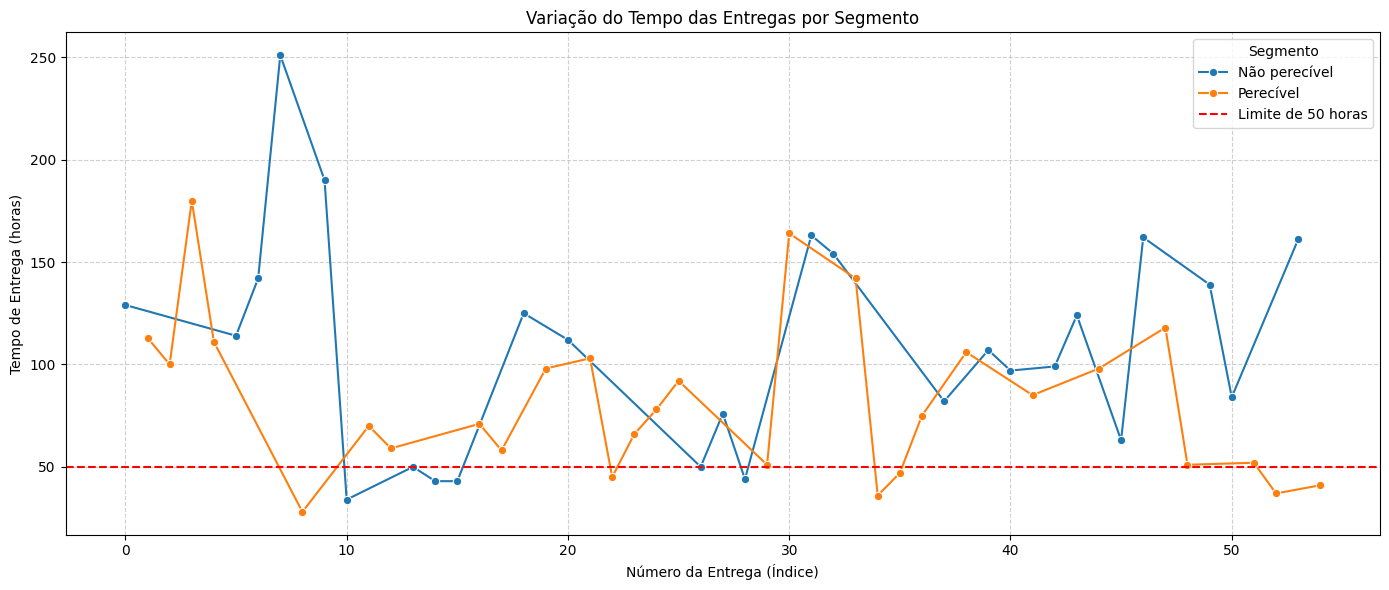

In [4]:
# Criar o gráfico de linha
plt.figure(figsize=(14, 6))
sns.lineplot(x=df.index, y='Tempo (h)', hue='Segmento', data=df, marker='o', markersize=6)

# Adicionar a linha horizontal no limite de 50 horas
plt.axhline(y=50, color='red', linestyle='--', label='Limite de 50 horas')

plt.title('Variação do Tempo das Entregas por Segmento')
plt.xlabel('Número da Entrega (Índice)')
plt.ylabel('Tempo de Entrega (horas)')
plt.legend(title='Segmento')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

b) Qual é a distribuição do tempo de entrega para o caso das entregas perecíveis? E para as 
não perecíveis? Faça um histograma para cada um destes grupos. O comportamento é 
muito diferente? 

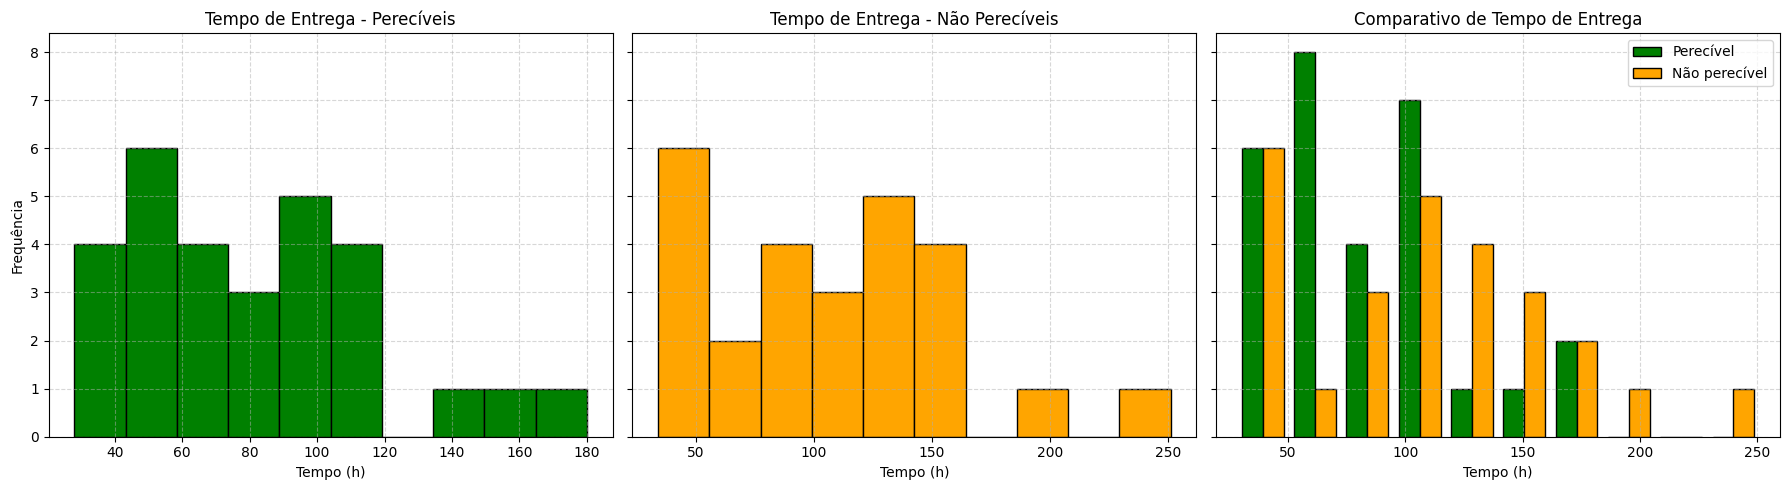

In [7]:
# Separar os dados por tipo de segmento
perecivel = df[df["Segmento"] == "Perecível"]["Tempo (h)"]
nao_perecivel = df[df["Segmento"] == "Não perecível"]["Tempo (h)"]

# Criar os histogramas
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Histograma para Perecíveis
axs[0].hist(perecivel, bins=10, color='green', edgecolor='black')
axs[0].set_title("Tempo de Entrega - Perecíveis")
axs[0].set_xlabel("Tempo (h)")
axs[0].set_ylabel("Frequência")
axs[0].grid(True, linestyle='--', alpha=0.5)

# Histograma para Não Perecíveis
axs[1].hist(nao_perecivel, bins=10, color='orange', edgecolor='black')
axs[1].set_title("Tempo de Entrega - Não Perecíveis")
axs[1].set_xlabel("Tempo (h)")
axs[1].grid(True, linestyle='--', alpha=0.5)

# Histograma combinado
axs[2].hist([perecivel, nao_perecivel], bins=10, label=['Perecível', 'Não perecível'],
            color=['green', 'orange'], edgecolor='black', stacked=False)
axs[2].set_title("Comparativo de Tempo de Entrega")
axs[2].set_xlabel("Tempo (h)")
axs[2].legend()
axs[2].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


c) Considerando todos os valores de entregas no segmento de perecíveis, é provável que 
as mercadorias cheguem no seu destino a tempo?

Resposta: Não, os dados mostram que as maiorias das entregas estão acima de 50 horas.

d) Analisando estes dados, a empresa sabe fazer uma entrega de não perecíveis? Bastou as 
instruções dos diretores para a equipe ou ela deverá aprender mais sobre como trabalhar 
com este tipo de material? 

Resposta: Não, a empresa precisa aprender mais para poder assumir essa nova atividade de entrega até o limite de 50 horas.